# Does the total amount of 3 pointers made have an impact on wins?

Utilizing python to discover if there is a high correlation between 3 pointers made and wins

In [95]:
# importing libraries
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize']=(12,8)
pd.options.display.max_rows = 4000

In [76]:
# Importing the data
df = pd.read_csv('NBAproject Stats.csv')
df

,Team,G,W,L,FGA,FG,FG%,3PA,3P,3P%,2PA,2P,2P%,PTS,ORtg
0,Phoenix Suns,50,41,9,4461,2134,0.478,1583,580,0.366,2878,1554,0.540,5651,113.6
1,Golden State Warriors,52,39,13,4499,2095,0.466,2081,752,0.361,2418,1343,0.555,5754,111.7
2,Memphis Grizzlies,54,36,18,5032,2294,0.456,1761,597,0.339,3271,1697,0.519,6061,112.3
3,Chicago Bulls,50,32,18,4348,2074,0.477,1511,568,0.376,2837,1506,0.531,5565,113.1
4,Miami Heat,52,32,20,4452,2044,0.459,1885,707,0.375,2567,1337,0.521,5652,112.7
5,Philadelphia 76ers,51,31,20,4354,2019,0.464,1585,564,0.356,2769,1455,0.525,5497,111.5
6,Utah Jazz,52,31,21,4466,2106,0.472,2084,755,0.362,2382,1351,0.567,5898,115.8
7,Cleveland Cavaliers,52,31,21,4423,2064,0.467,1751,613,0.350,2672,1451,0.543,5552,110.7
8,Milwaukee Bucks,53,32,21,4709,2143,0.455,2077,745,0.359,2632,1398,0.531,5923,112.3
9,Brooklyn Nets,51,29,22,4498,2124,0.472,1605,566,0.353,2893,1558,0.539,5693,112.3


In [77]:
# Checking the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Team    30 non-null     object 
 1   G       30 non-null     int64  
 2   W       30 non-null     int64  
 3   L       30 non-null     int64  
 4   FGA     30 non-null     int64  
 5   FG      30 non-null     int64  
 6   FG%     30 non-null     float64
 7   3PA     30 non-null     int64  
 8   3P      30 non-null     int64  
 9   3P%     30 non-null     float64
 10  2PA     30 non-null     int64  
 11  2P      30 non-null     int64  
 12  2P%     30 non-null     float64
 13  PTS     30 non-null     int64  
 14  ORtg    30 non-null     float64
dtypes: float64(4), int64(10), object(1)
memory usage: 3.6+ KB


In [78]:
# Getting the descriptive statistics
df.describe()

,G,W,L,FGA,FG,FG%,3PA,3P,3P%,2PA,2P,2P%,PTS,ORtg
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.0000,30.000000,30.000000,30.000000,30.000000
mean,51.600000,25.800000,25.800000,4542.533333,2066.766667,0.454967,1823.733333,636.200000,0.348933,2718.8000,1430.566667,0.526467,5612.100000,110.313333
std,1.191927,7.317433,7.331557,166.771314,100.229971,0.015327,168.183999,65.894063,0.016320,205.8378,110.282297,0.019249,228.239945,3.049673
min,49.000000,12.000000,9.000000,4348.000000,1852.000000,0.417000,1511.000000,515.000000,0.314000,2382.0000,1264.000000,0.491000,5054.000000,102.900000
25%,51.000000,19.500000,21.000000,4428.500000,2020.000000,0.449000,1690.500000,583.000000,0.339750,2568.5000,1347.750000,0.519000,5504.000000,108.925000
50%,52.000000,26.000000,25.000000,4487.000000,2074.000000,0.456500,1840.500000,624.500000,0.351000,2719.5000,1416.000000,0.528000,5623.000000,110.850000
75%,52.000000,31.000000,31.750000,4637.250000,2131.500000,0.465750,1925.750000,678.000000,0.359000,2823.7500,1515.000000,0.539750,5757.750000,112.300000
max,54.000000,41.000000,41.000000,5032.000000,2294.000000,0.478000,2118.000000,755.000000,0.376000,3271.0000,1697.000000,0.567000,6061.000000,115.800000


Text(0, 0.5, 'Wins')

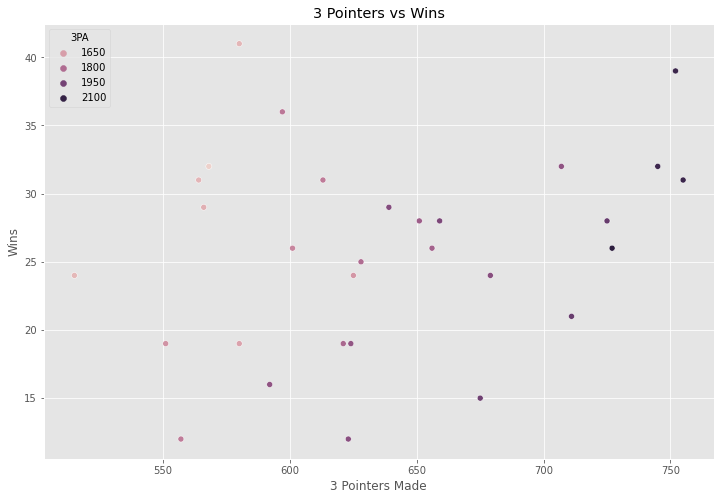

In [79]:
# scatter plot with 3P vs Wins
sns.scatterplot( x ='3P', y ='W', data=df,hue='3PA')
plt.title('3 Pointers vs Wins')
plt.xlabel('3 Pointers Made')
plt.ylabel('Wins')

Text(0, 0.5, 'Wins')

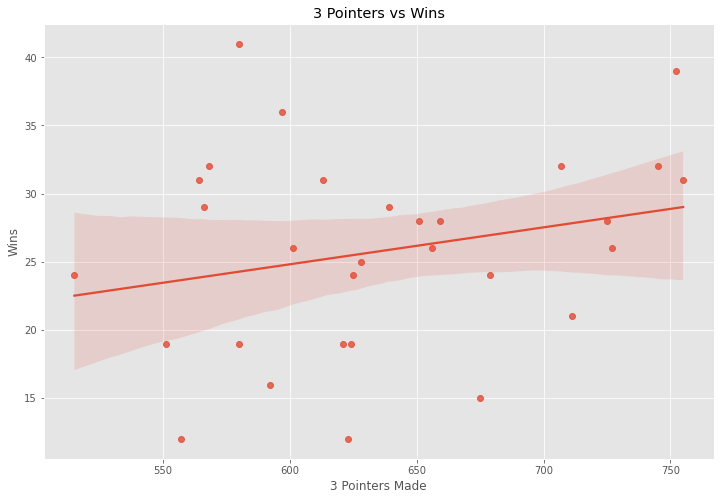

In [80]:
# Regression plot
sns.regplot( x ='3P', y ='W', data=df)
plt.title('3 Pointers vs Wins')
plt.xlabel('3 Pointers Made')
plt.ylabel('Wins')

In [81]:
# Looking at a table of correlations. The closer to 1, the higher the correlation.
df.corr(method='pearson')

,G,W,L,FGA,FG,FG%,3PA,3P,3P%,2PA,2P,2P%,PTS,ORtg
G,1.000000,0.069584,0.093125,0.705236,0.564924,0.050207,0.429660,0.377752,-0.036872,0.220324,0.287723,0.169230,0.660919,0.021439
W,0.069584,1.000000,-0.986761,0.023996,0.473432,0.673561,-0.035237,0.243880,0.612905,0.048233,0.284559,0.519683,0.497269,0.750791
L,0.093125,-0.986761,1.000000,0.090704,-0.380678,-0.664101,0.105021,-0.181998,-0.617719,-0.012321,-0.237234,-0.491170,-0.388862,-0.745859
FGA,0.705236,0.023996,0.090704,1.000000,0.734237,-0.038250,0.244745,0.176175,-0.104397,0.610234,0.562046,-0.066678,0.667152,0.060022
FG,0.564924,0.473432,-0.380678,0.734237,1.000000,0.650003,-0.002362,0.168512,0.377125,0.596815,0.808163,0.495741,0.919420,0.595788
FG%,0.050207,0.673561,-0.664101,-0.038250,0.650003,1.000000,-0.272339,0.053780,0.668437,0.191530,0.558621,0.809059,0.609553,0.813176
3PA,0.429660,-0.035237,0.105021,0.244745,-0.002362,-0.272339,1.000000,0.895843,-0.025598,-0.618777,-0.537416,0.169023,0.279952,-0.047982
3P,0.377752,0.243880,-0.181998,0.176175,0.168512,0.053780,0.895843,1.000000,0.419717,-0.589228,-0.444352,0.308727,0.465228,0.294648
3P%,-0.036872,0.612905,-0.617719,-0.104397,0.377125,0.668437,-0.025598,0.419717,1.000000,-0.063668,0.091967,0.339171,0.465245,0.752438
2PA,0.220324,0.048233,-0.012321,0.610234,0.596815,0.191530,-0.618777,-0.589228,-0.063668,1.000000,0.894481,-0.192127,0.311791,0.087835


In [82]:
# Low Correlation between 3 pointers made and Wins. However FG% and Offensive Rating has a stronger correlation with wins
Correlation_matrix = df.corr(method='pearson')


<AxesSubplot:>

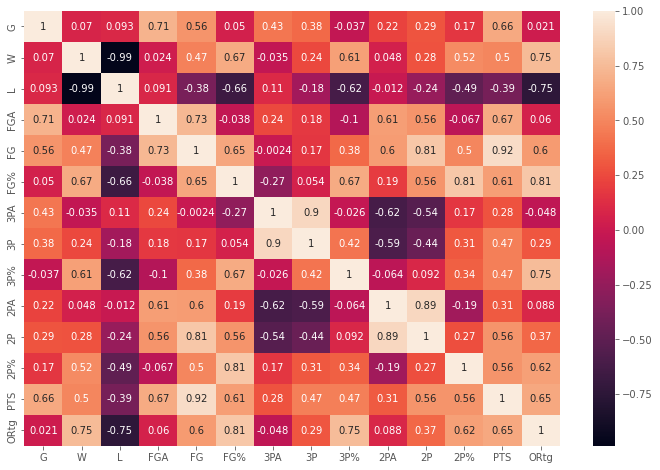

In [83]:
# Looking a heatmap to easily see the correlation between all the variables
sns.heatmap(Correlation_matrix, annot=True)

In [96]:
# Unstacking and organizing the correlations between each variable
correlation_mat = df.corr()
corr_pairs = correlation_mat.unstack(level=0)
corr_pairs

G     G       1.000000
      W       0.069584
      L       0.093125
      FGA     0.705236
      FG      0.564924
      FG%     0.050207
      3PA     0.429660
      3P      0.377752
      3P%    -0.036872
      2PA     0.220324
      2P      0.287723
      2P%     0.169230
      PTS     0.660919
      ORtg    0.021439
W     G       0.069584
      W       1.000000
      L      -0.986761
      FGA     0.023996
      FG      0.473432
      FG%     0.673561
      3PA    -0.035237
      3P      0.243880
      3P%     0.612905
      2PA     0.048233
      2P      0.284559
      2P%     0.519683
      PTS     0.497269
      ORtg    0.750791
L     G       0.093125
      W      -0.986761
      L       1.000000
      FGA     0.090704
      FG     -0.380678
      FG%    -0.664101
      3PA     0.105021
      3P     -0.181998
      3P%    -0.617719
      2PA    -0.012321
      2P     -0.237234
      2P%    -0.491170
      PTS    -0.388862
      ORtg   -0.745859
FGA   G       0.705236
      W    

In [97]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

L     W      -0.986761
W     L      -0.986761
L     ORtg   -0.745859
ORtg  L      -0.745859
L     FG%    -0.664101
FG%   L      -0.664101
3PA   2PA    -0.618777
2PA   3PA    -0.618777
L     3P%    -0.617719
3P%   L      -0.617719
2PA   3P     -0.589228
3P    2PA    -0.589228
2P    3PA    -0.537416
3PA   2P     -0.537416
2P%   L      -0.491170
L     2P%    -0.491170
3P    2P     -0.444352
2P    3P     -0.444352
PTS   L      -0.388862
L     PTS    -0.388862
      FG     -0.380678
FG    L      -0.380678
3PA   FG%    -0.272339
FG%   3PA    -0.272339
L     2P     -0.237234
2P    L      -0.237234
2P%   2PA    -0.192127
2PA   2P%    -0.192127
3P    L      -0.181998
L     3P     -0.181998
3P%   FGA    -0.104397
FGA   3P%    -0.104397
2P%   FGA    -0.066678
FGA   2P%    -0.066678
2PA   3P%    -0.063668
3P%   2PA    -0.063668
3PA   ORtg   -0.047982
ORtg  3PA    -0.047982
FG%   FGA    -0.038250
FGA   FG%    -0.038250
3P%   G      -0.036872
G     3P%    -0.036872
3PA   W      -0.035237
W     3PA  

In [99]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

W     2P%     0.519683
2P%   W       0.519683
2P    PTS     0.557638
PTS   2P      0.557638
FG%   2P      0.558621
2P    FG%     0.558621
FGA   2P      0.562046
2P    FGA     0.562046
2P%   PTS     0.563509
PTS   2P%     0.563509
G     FG      0.564924
FG    G       0.564924
ORtg  FG      0.595788
FG    ORtg    0.595788
2PA   FG      0.596815
FG    2PA     0.596815
PTS   FG%     0.609553
FG%   PTS     0.609553
2PA   FGA     0.610234
FGA   2PA     0.610234
3P%   W       0.612905
W     3P%     0.612905
2P%   ORtg    0.618013
ORtg  2P%     0.618013
FG    FG%     0.650003
FG%   FG      0.650003
PTS   ORtg    0.651470
ORtg  PTS     0.651470
G     PTS     0.660919
PTS   G       0.660919
      FGA     0.667152
FGA   PTS     0.667152
3P%   FG%     0.668437
FG%   3P%     0.668437
W     FG%     0.673561
FG%   W       0.673561
G     FGA     0.705236
FGA   G       0.705236
FG    FGA     0.734237
FGA   FG      0.734237
W     ORtg    0.750791
ORtg  W       0.750791
3P%   ORtg    0.752438
ORtg  3P%  

The calculations show that there is little correlation between 3 pointers made and wins. Instead we can see that there are higher correlations with wins between overall FG%, 3P%, and ORtg. This means that teams who are efficient and have good shot selections most likely have more wins.